#Linear Regression

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Load Data

In [ ]:
df_Data_Normal = pd.read_csv("Data_Normal.txt")
print(df_Data_Normal.head())
df_Data_Normal.shape

   Height     Weight    Male
0  151.765  47.825606      1
1  139.700  36.485807      0
2  136.525  31.864838      0
3  156.845  53.041915      1
4  145.415  41.276872      0


(60, 3)

In [ ]:
import pandas as pd
  
df_Data_With_Outlier = pd.read_csv("Data_With_Outlier.txt")
print(df_Data_With_Outlier.head())
df_Data_With_Outlier.shape

   Height     Weight    Male
0  151.765  47.825606      1
1  139.700  36.485807      0
2  136.525  31.864838      0
3  156.845  53.041915      1
4  145.415  41.276872      0


(62, 3)

#Normalize Dataset

In [ ]:
from sklearn import preprocessing
import numpy as np
d = preprocessing.normalize(df_Data_Normal)
scaled_df_Normal = pd.DataFrame(d, columns=['Height','Weight','Male'])
scaled_df_Normal.head()

,Height,Weight,Male
0,0.953744,0.300553,0.006284
1,0.967546,0.252696,0.000000
2,0.973827,0.227291,0.000000
3,0.947280,0.320351,0.006040
4,0.961995,0.273068,0.000000


In [ ]:
from sklearn import preprocessing
import numpy as np
d = preprocessing.normalize(df_Data_With_Outlier)
scaled_df_Outlier = pd.DataFrame(d, columns=['Height','Weight','Male'])
scaled_df_Outlier.head()

,Height,Weight,Male
0,0.953744,0.300553,0.006284
1,0.967546,0.252696,0.000000
2,0.973827,0.227291,0.000000
3,0.947280,0.320351,0.006040
4,0.961995,0.273068,0.000000


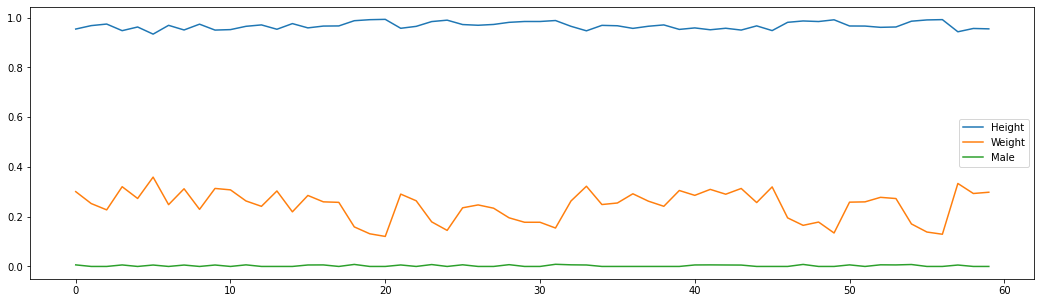

In [ ]:
scaled_df_Normal.plot(figsize=(18,5))

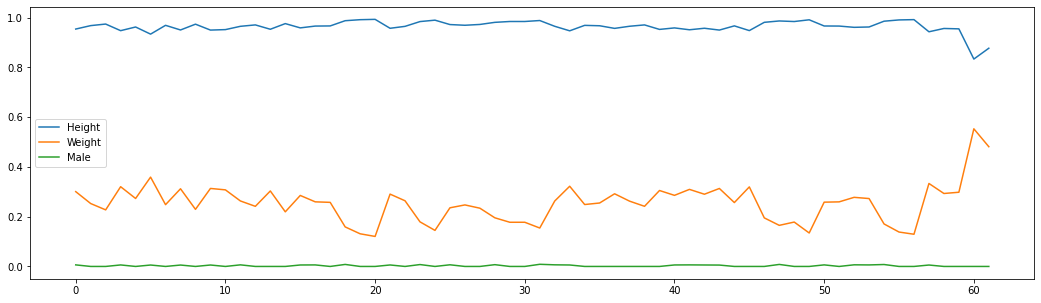

In [ ]:
scaled_df_Outlier.plot(figsize=(18,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64baffca10>,
      dtype=object)

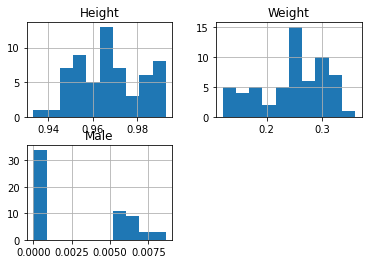

In [ ]:
scaled_df_Normal.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64baeaaf90>,
      dtype=object)

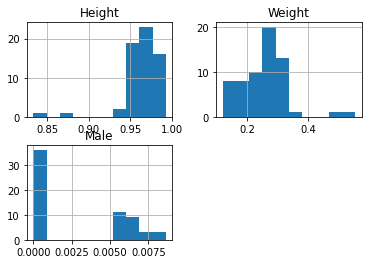

In [ ]:
scaled_df_Outlier.hist()

#Plot

Text(0, 0.5, 'weight')

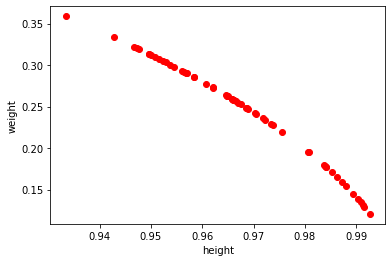

In [ ]:
plt.scatter(scaled_df_Normal.Height,scaled_df_Normal.Weight,color='red')
plt.xlabel("height")
plt.ylabel("weight")

Text(0, 0.5, 'weight')

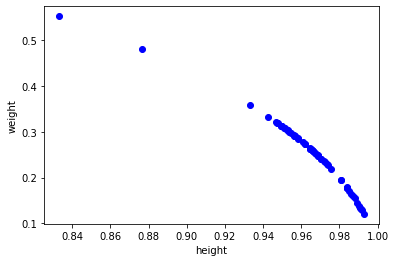

In [ ]:
plt.scatter(scaled_df_Outlier.Height,scaled_df_Outlier.Weight,color='blue')
plt.xlabel("height")
plt.ylabel("weight")

In [ ]:
X_train = scaled_df_Normal.Height
Y_train = scaled_df_Normal.Weight

X_test = scaled_df_Outlier.Height
Y_test = scaled_df_Outlier.Weight

#Reshape

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Create data the same way
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Add an index value by "reshaping" data
X_train = X_train.reshape(-1, 1)
#Y_train = Y_train.reshape(-1, 1)

# Create data the same way
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Add an index value by "reshaping" data
X_test = X_test.reshape(-1, 1)
#Y_test = Y_test.reshape(-1, 1)

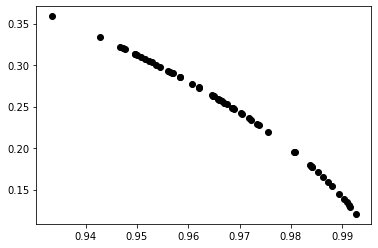

In [ ]:
plt.scatter(X_train, Y_train,color='black')
plt.show()

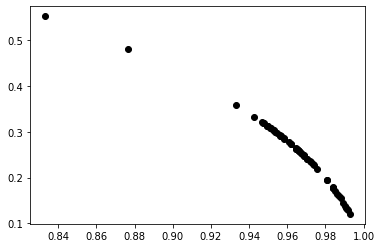

In [ ]:
plt.scatter(X_test, Y_test,color='black')
plt.show()

#Train the model

#Batch GRADIENT DESCENT 

In [ ]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent_Batch(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        print("iter %s | J: %.3f" % (iter, J))  
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.01 # learning rate
    theta = gradient_descent_2(alpha, x, y, 1000)

    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    pylab.plot(x[:,1],y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print("Done!")

In [ ]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [ ]:
m=regr.coef_[0]
b=regr.intercept_
print("slope=",m, "intercept=",b)

slope= -4.1195381458817915 intercept= 4.2307746676018105


In [ ]:
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))


Coefficients: 
 [-4.11953815]
Mean squared error: 0.00
Coefficient of determination: 0.77


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

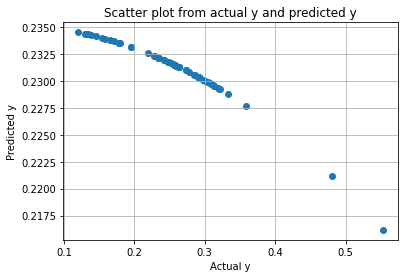

Mean Squared Error : 0.006809081960909414


In [ ]:
# SkLearn SGD classifier
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X_train, Y_train)
Y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,Y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(Y_test, Y_pred_sksgd))

In [ ]:
def MyCustomSGD(train_data,learning_rate,n_iter,k,divideby):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['Weight'])
        #x=np.array(temp.drop('Male',axis=1))
        x=np.array(temp['Height'])
        
        # We keep our initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # Incrementing the iteration value
        cur_iter=cur_iter+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/divideby
        
    return w,b #Returning the weights and Bias

In [ ]:
def My2CustomSGD(train_data,learning_rate,n_iter,k,divideby):
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    cur_iter=1
    while(cur_iter<=n_iter): 
#         print("LR: ",learning_rate)
        temp=train_data.sample(k)
 
    #return w,b
    print(temp)
    return temp

In [ ]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
x_train = scaler.transform(X_train)
train_data=pd.DataFrame(x_train)

In [ ]:
w,b=My2CustomSGD(train_data,learning_rate=1,n_iter=100,divideby=2,k=10)
y_pred_customsgd=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

In [ ]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [ ]:
w,b=MyCustomSGD(scaled_df_Normal,learning_rate=1,n_iter=100,divideby=2,k=10)
y_pred_customsgd=predict(X_test,w[0,0],b)

plt.scatter(Yy_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, y_pred_customsgd))